In [3]:
import numpy as np

# CIFAR-10 classifier with CNN

![](pics/data.png)

## Task 1: Forward pass and Backward pass for Convolution

Implement a naive conv_forward function and apply the vertical and horizontal filter on example images

Implement a conv_forward using im2col and also apply the filter on example images

Implement a conv_backward using im2col and do some numerical gradient test

In [1]:
from sklearn.datasets import load_sample_image

In [4]:
china = load_sample_image('china.jpg')[150:220, 130:250] / 255
flower = load_sample_image("flower.jpg")[150:220, 130:250] / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [5]:
import sklearn
import matplotlib.pyplot as plt

In [6]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

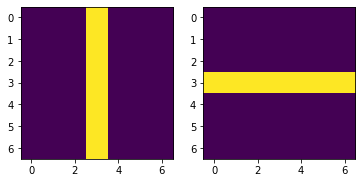

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(filters[:, :, 0, 0])
plt.subplot(1, 2, 2)
plt.imshow(filters[:, :, 0, 1])
plt.show()

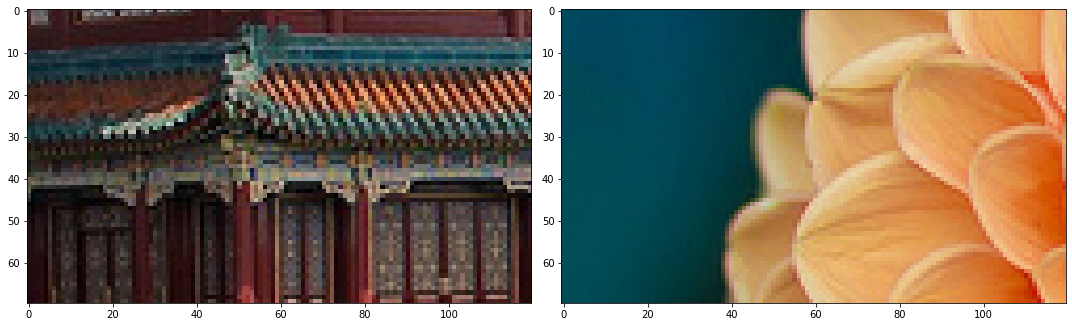

In [8]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(china)
plt.subplot(1, 2, 2)
plt.imshow(flower)
plt.tight_layout()
plt.show()

In [31]:
#!pip install torch torchvision -i https://pypi.douban.com/simple

In [9]:
# if you don't have torch and torchvision 
# uncomment and run the above cell 
import torch
import torch.nn.functional as F

In [12]:
filters = np.transpose(filters, (3, 2, 0, 1))
# We will want our image to be NCHW format for pytorch to process
images = np.transpose(images, (0, 3, 1, 2))

In [13]:
# Example on convolution using pytorch
images_tensor = torch.Tensor(images)
filters_tensor = torch.Tensor(filters)
outputs = F.conv2d(images_tensor, filters_tensor, )

In [14]:
china_convolved = outputs[0].numpy()
flower_convolved = outputs[1].numpy()

In [15]:
china_convolved = np.transpose(china_convolved, (1, 2, 0))
flower_convolved = np.transpose(flower_convolved, (1, 2, 0))

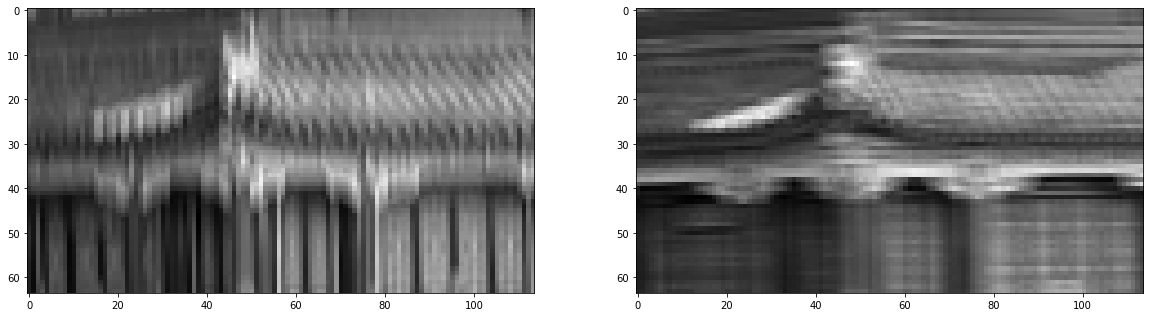

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(china_convolved[:, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(china_convolved[:, :, 1], cmap='gray')
plt.show()

In [ ]:
def conv_forward_naive(x, w, b=None, pad=0, strides=1):
    """
    A naive implementation of the forward pass for a convolutional layer.
    The input consists of N data points, each with C channels, height H and width
    W. We convolve each input with F different filters, where each filter spans
    all C channels and has height HH and width HH.
    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - stride: The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
    - pad: The number of pixels that will be used to zero-pad the input.
    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, pad, strides)
    """
    out = None
    N, C, H, W = x.shape
    F, C, HH, WW = w.shape
    S = strides
    P = pad
    
    if b is None:
        b = np.zeros((F))

    """
        TODO: write your code here
    """

    cache = (x, w, b, pad, strides)
    return out, cache

In [35]:
"""
    Here apply you implmentation of convolution on the sample images
    and show the result
"""

'\n    Here apply you implmentation of convolution on the sample images\n    and show the result\n'

### im2col

it turns out that we can use a clever algorithm called
im2col to convert a image to a matrix and the convolution
(which we naively implement using for-loops) will be 
a single matrix multiplication

check this [url](http://cs231n.github.io/convolutional-networks/#conv) and Yangqing's memo [Conv in Caffe](https://github.com/Yangqing/caffe/wiki/Convolution-in-Caffe:-a-memo)

![](pics/1.jpg)
<table><tr>
<td><img src=pics/2.jpg border=0></td>
<td><img src=pics/3.jpg border=0></td>
</tr></table>
<table><tr>
<td><img src=pics/4.jpg border=0></td>
<td><img src=pics/5.jpg border=0></td>
</tr></table>

In [17]:
def im2col(image, ksize, stride):
    """
        TODO: Implement a im2col to NCHW format images
    """
    pass

In [18]:
def conv_forward_im2col(x, w, b=None, pad=0, strides=1):
    """
        TODO: Implement conv_forward using im2col
    """
    pass

In [36]:
"""
    Here apply you implmentation of convolution on the sample images
    and show the result
"""

'\n    Here apply you implmentation of convolution on the sample images\n    and show the result\n'

In [19]:
def conv_backward_im2col(dout, cache):
    """
        TODO
    """
    pass

We can actually sees that the gradient through the convolution is
the rotated kernel convolves over the error from later layer

(if you prefer solid math over this visual proof, check [this](https://grzegorzgwardys.wordpress.com/2016/04/22/8/) [this](https://www.jefkine.com/general/2016/09/05/backpropagation-in-convolutional-neural-networks/) and this [lecture notes](http://courses.cs.tau.ac.il/Caffe_workshop/Bootcamp/pdf_lectures/Lecture%203%20CNN%20-%20backpropagation.pdf))

<table><tr>
<td><img src=pics/convolution-mlp-mapping.png border=0></td>
<td><img src=pics/cnn_gradient_finger.png border=0></td>
</tr></table>
<table><tr>
<td><img src=pics/konwolucja.png border=0></td>
<td><img src=pics/screenshot-from-2016-04-17-212043.png border=0></td>
</tr></table>

In [20]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad

You relative error from the below cell output should be around 1e-9

In [ ]:
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
stride, pad = 1, 1

dx_num = eval_numerical_gradient_array(lambda x: conv_forward_im2col(x, w, b, pad, stride)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward_im2col(x, w, b, pad, stride)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward_im2col(x, w, b, pad, stride)[0], b, dout)

out, cache = conv_forward_im2col(x, w, b, pad, stride)
dx, dw, db = conv_backward_im2col(dout, cache)

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

print("dx error: ", rel_error(dx, dx_num))
print("dw error: ", rel_error(dw, dw_num))
print("db error: ", rel_error(db, db_num))

## Task 2: Forward pass and backward pass of other layers

<table><tr>
<td><img src="pics/10.jpg" alt="3" style="zoom:50%;" border=0></td>
<td><img src="pics/11.jpg" alt="3" style="zoom:50%;" border=0></td>
</tr></table>

you can choose either pool method and implement

In [22]:
def pool_forward(x, height, width, ksize, method):
    """
        TODO
    """
    pass
def pool_backward(x, height, width, ksize, method):
    """
        TODO
    """
    pass

In [23]:
def fc_forward(x, w, b):
    """
        TODO
    """
    pass

def fc_backward(dout, cache):
    """
        TODO
    """
    pass

In [24]:
def relu_forward(x):
    """
        TODO
    """
    pass
def relu_backward(dout, cache):
    """
        TODO
    """
    pass

In [26]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
      for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - probs: The predicted probability
    - dx: Gradient of the loss with respect to x
    """
    """
        TODO
    """
    pass

## Task3: Combine all this together and train a CNN on CIFAR-10!

You can use an arch samiliar to LeNet ![](https://images2017.cnblogs.com/blog/1093303/201802/1093303-20180217131615671-367457714.png)

1. overfit a small data(achieve 100% accuracy on a small data)
2. train on the whole training data, validation on validation data, finally test on test data

In [30]:
#!pip install torch torchvision -i https://pypi.douban.com/simple

In [29]:
import torchvision

# I'm using torchvision to load the CIFAR10 dataset
# if you don't have torch and torchvision 
# uncomment and run the above cell 
def load_cifar(path='./data'):
    cifar_train = torchvision.datasets.cifar.CIFAR10(path, download=True)
    cifar_test = torchvision.datasets.cifar.CIFAR10(path, download=True, train=False)

    cifar_train_img_list, cifar_train_label_list = [], []
    for train_example in cifar_train:
        img = np.array(train_example[0])[np.newaxis, :]
        label = train_example[1]
        cifar_train_img_list.append(img)
        cifar_train_label_list.append(label)
    cifar_train_img = np.concatenate(cifar_train_img_list, axis=0).astype(np.float) / 255
    cifar_train_label = np.array(cifar_train_label_list).astype(np.int)

    cifar_test_img_list, cifar_test_label_list = [], []
    for test_example in cifar_test:
        img = np.array(test_example[0])[np.newaxis, :]
        label = test_example[1]
        cifar_test_img_list.append(img)
        cifar_test_label_list.append(label)
    cifar_test_img = np.concatenate(cifar_test_img_list, axis=0).astype(np.float) / 255
    cifar_test_label = np.array(cifar_test_label_list).astype(np.int)

    return cifar_train_img[:49000], cifar_train_label[:49000], \
          cifar_train_img[49000:], cifar_train_label[49000:], \
          cifar_test_img, cifar_test_label

In [32]:
X, y, X_val, y_val, X_test, y_test = load_cifar()
X = np.transpose(X, (0, 3, 1, 2))
X_val = np.transpose(X_val, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))
batch_size = 64
X_mini_batches = [X[k:k+batch_size] for k in range(0, len(X), batch_size)]
y_mini_batches = [y[k:k+batch_size] for k in range(0, len(y), batch_size)]
X_dummy = X[:100]
y_dummy = y[:100]

Files already downloaded and verified
Files already downloaded and verified


In [33]:
X.shape, y.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((49000, 3, 32, 32),
 (49000,),
 (1000, 3, 32, 32),
 (1000,),
 (10000, 3, 32, 32),
 (10000,))

### Check if you have any bug by overfitting a small dat

In [34]:
X_dummy.shape, y_dummy.shape

((100, 3, 32, 32), (100,))

In [ ]:
for epoch in range(200):
    alpha = 0.1
    reg = 0.01
    # forward pass through network using X_dummy
    """
        TODO
    """
    #from ipdb import set_trace; set_trace()
    # Calculate the loss
    """
        TODO
    """
    
    

    acc = np.mean(np.argmax(pred, axis=1) == y_dummy)
    if epoch % 20 == 0:
        #print('dloss: ', dloss)
        print('epoch:', epoch, 'loss:', loss)
        print('epoch:', epoch, 'reg_loss:', reg_loss)
        print('epoch:', epoch, 'acc:', acc)

    # backward pass through network
    """
        TODO
    """
    
    # update parameter
    """
        TODO
    """

### Train on the whole dataset

```python
for epoch in range(num_epoch):
    for X_batch, y_batch in zip(X_batches, y_batches)
        forward(X_batch)
        loss(pred, y_batch)
        backward()
        update()
    if epoch % interval == 0:
        validate(X_val, y_val)

test(X_test, y_test)
```